In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import utils_attributes_analysis
import utils

In [2]:
df = pd.read_csv("../../data/selected_dataset.csv")
df = df[df['developerdecision']!='UnknownConcatenation']
df.head()

,chunk_id,developerdecision,line_start,line_end,line_separator,kind_conflict,url,project,project_user,project_name,path,file_name,sha,leftsha,rightsha,basesha,left_lines_added,left_lines_removed,right_lines_added,right_lines_removed,conclusion_delay,keyword_fix,keyword_bug,keyword_feature,keyword_improve,keyword_document,keyword_refactor,keyword_update,keyword_add,keyword_remove,keyword_use,keyword_delete,keyword_change,leftCC,rightCC,fileCC,chunkAbsSize,chunkRelSize,chunkPosition,Branching time,Merge isolation time,Devs 1,Devs 2,Different devs,Same devs,Devs intersection,Commits 1,Commits 2,Changed files 1,Changed files 2,Changed files intersection,self_conflict_perc,chunk_left_abs_size,chunk_left_rel_size,chunk_right_abs_size,chunk_right_rel_size
0,777206,ConcatenationV2V1,1108,1115,1110,"Attribute, Comment, Method invocation",https://github.com/Ramblurr/Anki-Android,Ramblurr/Anki-Android,Ramblurr,Anki-Android,Ramblurr/Anki-Android/src/com/ichi2/anki/Revie...,Reviewer.java,2d88e89330552363f1d2af979ac3ebf232a91fb3,9d7836b5669d0e46f064fc9e6f38cf083af0596d,1f156abfcadb3d3913098ee78c1bd0d94fb71e9b,64ee8602e09ea183670543eef0641cbbbaf73aa9,38.0,58.0,6088.0,19261.0,65.0,28.0,9.0,2.0,2.0,0.0,0.0,6.0,9.0,5.0,18.0,2.0,12.0,1.0,1.0,533.0,10.0,0.004775,1.0,73.111331,74.987998,13.0,1.0,14.0,1.0,1.0,85.0,1.0,313.0,2.0,1.0,0.000000,202.0,0.789062,54.0,0.210938
1,777207,Version 1,0,199,130,"Comment, Method declaration",https://github.com/Ramblurr/Anki-Android,Ramblurr/Anki-Android,Ramblurr,Anki-Android,Ramblurr/Anki-Android/src/com/ichi2/anki/Revie...,Reviewer.java,2d5c6e5d12d784bd7538eb5aab421691ce4c688d,2cc6902f6ee2d91c8629a6e2c9a52e4e097bf458,b514b5f6701fda49873f080da5be47a16a960394,af5bfb3e0e56ecd8413c853d266babe49a95e16e,1312.0,1025.0,801.0,7814.0,7.0,9.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,4.0,6.0,0.0,8.0,1.0,6.0,527.0,46.0,0.015108,4.0,41.629329,48.286817,8.0,3.0,11.0,2.0,1.0,9.0,25.0,25.0,108.0,1.0,NaN,0.0,0.000000,1723.0,1.000000
2,777216,Combination,35,81,36,"Comment, Method invocation, Variable",https://github.com/Ramblurr/Anki-Android,Ramblurr/Anki-Android,Ramblurr,Anki-Android,Ramblurr/Anki-Android/src/com/ichi2/anki/Revie...,Reviewer.java,f32b758df664833130d5d75006a09df0fae43d71,a4aadbce8fcf23feae6eae07232615200796f017,51e8088a8bb66a2724ca26c8aa84b8f4e7db1a4c,1faa5059f12dc3df89ac25550565b3cfda91a6a2,1686.0,785.0,7.0,26.0,0.0,16.0,4.0,6.0,1.0,0.0,0.0,4.0,3.0,7.0,1.0,6.0,8.0,3.0,1.0,511.0,8.0,0.004444,3.0,7.969722,8.096076,2.0,4.0,6.0,1.0,1.0,3.0,32.0,5.0,94.0,1.0,0.000000,207.0,0.752727,68.0,0.247273
3,777218,Combination,24,69,25,"Comment, Method invocation, Variable",https://github.com/Ramblurr/Anki-Android,Ramblurr/Anki-Android,Ramblurr,Anki-Android,Ramblurr/Anki-Android/src/com/ichi2/anki/Revie...,Reviewer.java,f32b758df664833130d5d75006a09df0fae43d71,a4aadbce8fcf23feae6eae07232615200796f017,51e8088a8bb66a2724ca26c8aa84b8f4e7db1a4c,1faa5059f12dc3df89ac25550565b3cfda91a6a2,1686.0,785.0,7.0,26.0,0.0,16.0,4.0,6.0,1.0,0.0,0.0,4.0,3.0,7.0,1.0,6.0,8.0,1.0,1.0,511.0,7.0,0.004148,3.0,7.969722,8.096076,2.0,4.0,6.0,1.0,1.0,3.0,32.0,5.0,94.0,1.0,0.333333,138.0,0.572614,103.0,0.427386
4,777221,Version 1,20,23,21,"Method invocation, Variable",https://github.com/Ramblurr/Anki-Android,Ramblurr/Anki-Android,Ramblurr,Anki-Android,Ramblurr/Anki-Android/src/com/ichi2/libanki/Me...,Media.java,59973c74b19c37712c469bdafbdb10cc665d7b93,d55c2d96484a99666182be460adde72090045317,17ffea93b3c39863f959d92f78c3df21818b74f8,7921c523e33cae37a7331396892feaf0830c4302,1682.0,2118.0,6.0,42.0,2.0,11.0,3.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,0.0,1.0,1.0,1.0,99.0,4.0,0.014474,4.0,18.725880,20.897963,1.0,3.0,4.0,0.0,0.0,2.0,29.0,5.0,276.0,1.0,NaN,0.0,0.000000,88.0,1.000000


In [3]:
total_chunks = len(df)
total_projects = len(pd.unique(df['project']))
total_merges = len(pd.unique(df['sha']))
print(f"The dataset has {total_merges} merges with {total_chunks} chunks from {total_projects} projects.")

The dataset has 7954 merges with 86214 chunks from 78 projects.


In [4]:
df.describe()

,chunk_id,line_start,line_end,line_separator,left_lines_added,left_lines_removed,right_lines_added,right_lines_removed,conclusion_delay,keyword_fix,keyword_bug,keyword_feature,keyword_improve,keyword_document,keyword_refactor,keyword_update,keyword_add,keyword_remove,keyword_use,keyword_delete,keyword_change,leftCC,rightCC,fileCC,chunkAbsSize,chunkRelSize,chunkPosition,Branching time,Merge isolation time,Devs 1,Devs 2,Different devs,Same devs,Devs intersection,Commits 1,Commits 2,Changed files 1,Changed files 2,Changed files intersection,self_conflict_perc,chunk_left_abs_size,chunk_left_rel_size,chunk_right_abs_size,chunk_right_rel_size
count,8.621400e+04,86214.000000,86214.000000,86214.000000,8.581800e+04,8.581800e+04,8.581800e+04,8.581800e+04,82273.000000,85818.000000,85818.000000,85818.00000,85818.000000,85818.000000,85818.000000,85818.000000,85818.000000,85818.000000,85818.000000,85818.000000,85818.000000,85727.000000,85727.000000,85727.000000,85727.000000,85727.000000,85727.000000,76064.000000,76064.000000,76064.000000,76064.000000,76064.000000,76064.000000,76064.000000,76064.000000,76064.000000,76064.000000,76064.000000,76064.000000,58351.000000,86214.000000,86214.000000,86214.000000,86214.000000
mean,1.164173e+06,4558.363885,4588.711137,4571.126499,5.040215e+03,4.000647e+04,5.249493e+04,9.934772e+04,8.345557,343.938113,173.805950,10.18608,22.238714,18.889825,17.106423,78.781118,263.507493,91.141019,156.405568,13.749447,423.338927,2.439173,3.653388,1097.487664,27.651732,3.264736,2.758722,55.760442,58.192593,32.422039,3.845564,36.267604,2.181426,0.836454,616.808569,152.020548,1534.091449,467.314564,0.982252,0.507145,451.479064,0.494625,674.602025,0.505235
std,2.251264e+05,15405.721219,15402.873034,15404.445904,5.201233e+04,2.812354e+05,2.389250e+05,2.498476e+05,25.775583,789.892532,501.532188,24.38461,46.138906,45.258760,34.686967,197.889900,579.512340,191.464779,343.142367,29.214790,1188.687982,9.063375,22.259533,2441.295512,182.301568,24.573312,1.215502,200.541940,203.515085,59.323468,7.073894,59.557510,5.318278,0.445282,1100.709275,555.847365,1781.645402,816.923020,0.136732,0.444131,4020.676377,0.260270,5427.650774,0.260273
min,7.772060e+05,0.000000,2.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,0.000141,1.000000,0.000000,-1.326053,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.829202e+05,58.000000,75.000000,67.000000,0.000000e+00,0.000000e+00,1.815000e+03,3.363000e+03,0.000000,11.000000,1.000000,0.00000,1.000000,0.000000,1.000000,3.000000,15.000000,2.000000,3.000000,0.000000,2.000000,1.000000,1.000000,11.000000,5.000000,0.007879,2.000000,0.870799,1.105312,2.000000,1.000000,4.000000,1.000000,1.000000,46.000000,1.000000,309.000000,17.000000,1.000000,0.000000,51.000000,0.434593,53.000000,0.440895
50%,1.138882e+06,212.000000,244.000000,226.000000,4.600000e+01,3.910000e+02,9.010000e+03,1.866150e+04,0.000000,51.000000,8.000000,2.00000,5.000000,3.000000,3.000000,13.000000,35.000000,12.000000,22.000000,1.000000,16.000000,1.000000,1.000000,70.000000,8.000000,0.036866,3.000000,9.829526,11.114850,5.000000,1.000000,9.000000,1.000000,1.000000,118.000000,2.000000,1263.000000,71.000000,1.000000,0.500000,122.000000,0.500000,130.000000,0.500000
75%,1.352117e+06,822.000000,876.000000,841.000000,9.290000e+02,2.653000e+03,6.474200e+04,8.743000e+04,8.000000,234.000000,65.000000,6.00000,16.000000,13.000000,11.000000,65.000000,183.000000,74.000000,126.000000,11.000000,113.000000,2.000000,2.000000,399.000000,17.000000,0.158416,4.000000,20.910833,21.574421,28.000000,4.000000,36.000000,1.000000,1.000000,649.000000,44.000000,2166.000000,698.000000,1.000000,1.000000,325.000000,0.559104,352.000000,0.565217
max,1.658630e+06,106776.000000,111167.000000,108980.000000,2.221395e+06,2.695

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns = list(df.select_dtypes(include=numerics))
not_attributes_columns = ['chunk_id', 'line_start', 'line_end', 'line_separator']
float_columns = ['chunkRelSize','self_conflict_perc','chunk_left_rel_size', 'chunk_right_rel_size']
numeric_columns = [elem for elem in numeric_columns if elem not in not_attributes_columns]
numeric_columns = [elem for elem in numeric_columns if elem not in float_columns]
print(numeric_columns)

['left_lines_added', 'left_lines_removed', 'right_lines_added', 'right_lines_removed', 'conclusion_delay', 'keyword_fix', 'keyword_bug', 'keyword_feature', 'keyword_improve', 'keyword_document', 'keyword_refactor', 'keyword_update', 'keyword_add', 'keyword_remove', 'keyword_use', 'keyword_delete', 'keyword_change', 'leftCC', 'rightCC', 'fileCC', 'chunkAbsSize', 'chunkPosition', 'Branching time', 'Merge isolation time', 'Devs 1', 'Devs 2', 'Different devs', 'Same devs', 'Devs intersection', 'Commits 1', 'Commits 2', 'Changed files 1', 'Changed files 2', 'Changed files intersection', 'chunk_left_abs_size', 'chunk_right_abs_size']


### Discretization of chunk numerical columns

In [6]:
discretized, labels = utils.get_discretized_df(df, numeric_columns)
discretized

,chunk_id,developerdecision,left_lines_added,left_lines_removed,right_lines_added,right_lines_removed,conclusion_delay,keyword_fix,keyword_bug,keyword_feature,keyword_improve,keyword_document,keyword_refactor,keyword_update,keyword_add,keyword_remove,keyword_use,keyword_delete,keyword_change,leftCC,rightCC,fileCC,chunkAbsSize,chunkPosition,Branching time,Merge isolation time,Devs 1,Devs 2,Different devs,Same devs,Devs intersection,Commits 1,Commits 2,Changed files 1,Changed files 2,Changed files intersection,chunk_left_abs_size,chunk_right_abs_size
0,777206,ConcatenationV2V1,Tens,Tens,Thousands,Tens of thousands,Tens,Tens,Few (<10),Few (<10),Few (<10),Zero,Zero,Few (<10),Few (<10),Few (<10),Tens,Few (<10),Tens,Few (<10),Few (<10),Hundreds,Few (<10),Few (<10),Tens,Tens,Tens,Few (<10),Tens,Few (<10),Few (<10),Tens,Few (<10),Hundreds,Few (<10),Few (<10),Hundreds,Tens
1,777207,Version 1,Thousands,Thousands,Hundreds,Thousands,Few (<10),Few (<10),Zero,Few (<10),Few (<10),Zero,Zero,Few (<10),Few (<10),Few (<10),Few (<10),Zero,Few (<10),Few (<10),Few (<10),Hundreds,Tens,Few (<10),Tens,Tens,Few (<10),Few (<10),Tens,Few (<10),Few (<10),Few (<10),Tens,Tens,Hundreds,Few (<10),Zero,Thousands
2,777216,Combination,Thousands,Hundreds,Few (<10),Tens,Zero,Tens,Few (<10),Few (<10),Few (<10),Zero,Zero,Few (<10),Few (<10),Few (<10),Few (<10),Few (<10),Few (<10),Few (<10),Few (<10),Hundreds,Few (<10),Few (<10),Few (<10),Few (<10),Few (<10),Few (<10),Few (<10),Few (<10),Few (<10),Few (<10),Tens,Few (<10),Tens,Few (<10),Hundreds,Tens
3,777218,Combination,Thousands,Hundreds,Few (<10),Tens,Zero,Tens,Few (<10),Few (<10),Few (<10),Zero,Zero,Few (<10),Few (<10),Few (<10),Few (<10),Few (<10),Few (<10),Few (<10),Few (<10),Hundreds,Few (<10),Few (<10),Few (<10),Few (<10),Few (<10),Few (<10),Few (<10),Few (<10),Few (<10),Few (<10),Tens,Few (<10),Tens,Few (<10),Hundreds,Hundreds
4,777221,Version 1,Thousands,Thousands,Few (<10),Tens,Few (<10),Tens,Few (<10),Zero,Zero,Zero,Zero,Few (<10),Few (<10),Few (<10),Few (<10),Zero,Few (<10),Few (<10),Few (<10),Tens,Few (<10),Few (<10),Tens,Tens,Few (<10),Few (<10),Few (<10),Zero,Zero,Few (<10),Tens,Few (<10),Hundreds,Few (<10),Zero,Tens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86210,1658387,Version 1,Zero,Zero,Thousands,Tens of thousands,Zero,Hundreds,Hundreds,Few (<10),Tens,Tens,Few (<10),Tens,Hundreds,Tens,Hundreds,Few (<10),Hundreds,Few (<10),Few (<10),Tens,Tens,Few (<10),Tens,Tens,Tens,Few (<10),Tens,Zero,Zero,Hundreds,Few (<10),Thousands,Thousands,Few (<10),Hundreds,Hundreds
86211,1658389,Version 1,Zero,Zero,Thousands,Tens of thousands,Zero,Hundreds,Hundreds,Few (<10),Tens,Tens,Few (<10),Tens,Hundreds,Tens,Hundreds,Few (<10),Hundreds,Few (<10),Few (<10),Hundreds,Few (<10),Few (<10),Tens,Tens,Tens,Few (<10),Tens,Zero,Zero,Hundreds,Few (<10),Thousands,Thousands,Few (<10),Hundreds,Hundreds
86212,1658390,Version 1,Zero,Zero,Thousands,Tens of thousands,Zero,Hundreds,Hundreds,Few (<10),Tens,Tens,Few (<10),Tens,Hundreds,Tens,Hundreds,Few (<10),Hundreds,Few (<10),Few (<10),Hundreds,Tens,Few (<10),Tens,Tens,Tens,Few (<10),Tens,Zero,Zero,Hundreds,Few (<10),Thousands,Thousands,Few (<10),Hundreds,Hundreds
86213,1658391,Version 1,Zero,Zero,Thousands,Tens of thousands,Zero,Hundreds,Hundreds,Few (<10),Tens,Tens,Few (<10),Tens,Hundreds,Tens,Hundreds,Few (<10),Hundreds,Few (<10),Few (<10),Hundreds,Tens,Few (<10),Tens,Tens,Tens,Few (<10),Tens,Zero,Zero,Hundreds,Few (<10),Thousands,Thousands,Few (<10),Hundreds,Hundreds


In [7]:
chunk_columns_categorical = ['leftCC', 'rightCC', 'chunkAbsSize', 'chunk_left_abs_size', 'chunk_right_abs_size' ]
chunk_columns_float = ['chunkRelSize', 'self_conflict_perc', 'chunk_left_rel_size', 'chunk_right_rel_size', 'chunkPosition' ]
# TODO: REMOVE THE LINE BELOW AFTER FIXING THIS ATTRIBUTE
chunk_columns_float.remove('chunkRelSize')

file_columns_categorical = ['fileCC']
# file_columns_float = []

merge_columns_categorical = ['left_lines_added', 'left_lines_removed', 'right_lines_added', 'right_lines_removed', 'conclusion_delay']
merge_columns_categorical.extend(['keyword_fix', 'keyword_bug', 'keyword_feature', 'keyword_improve', 'keyword_document'])
merge_columns_categorical.extend(['keyword_refactor', 'keyword_update','keyword_add', 'keyword_remove', 'keyword_use'])
merge_columns_categorical.extend(['keyword_delete', 'keyword_change', 'Branching time', 'Merge isolation time', 'Devs 1', 'Devs 2'])
merge_columns_categorical.extend(['Different devs', 'Same devs', 'Devs intersection', 'Commits 1', 'Commits 2'])
merge_columns_categorical.extend(['Changed files 1','Changed files 2', 'Changed files intersection'])
# merge_columns_float = []

 

## Chunk attributes

### Distribution of chunk categorical attributes

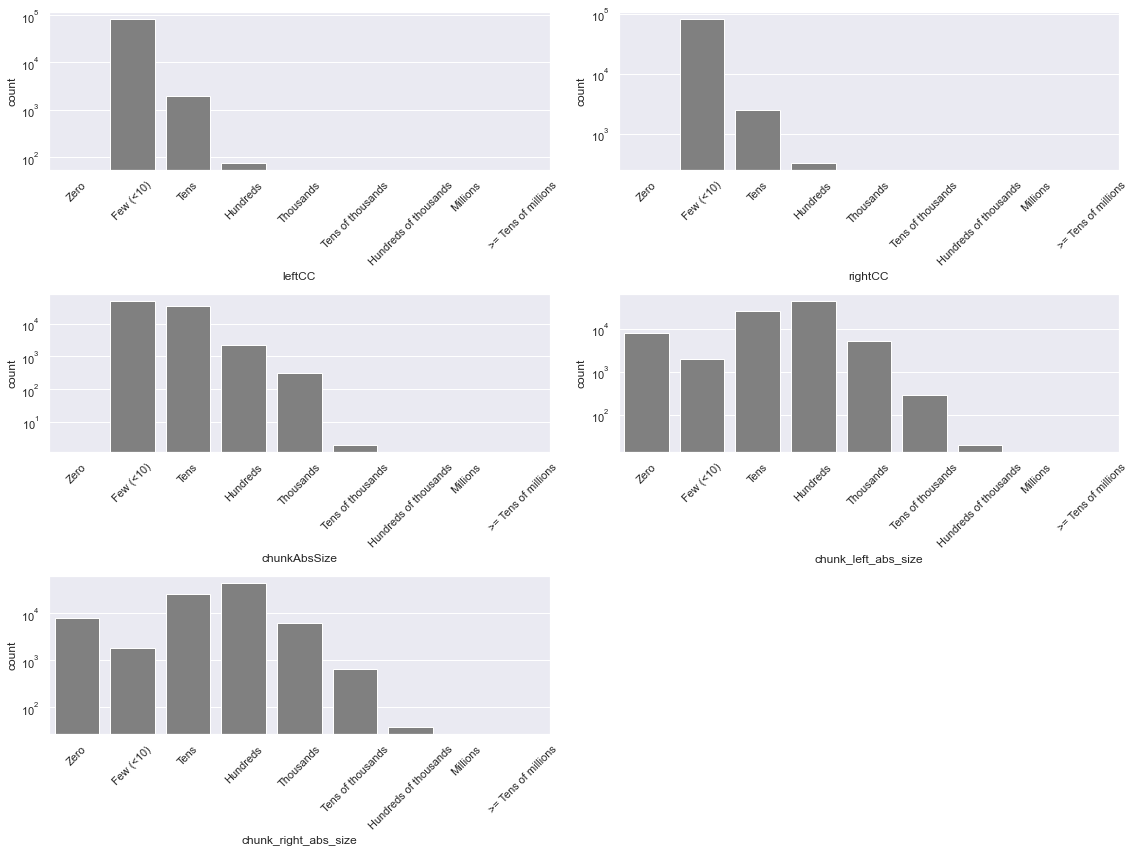

In [122]:
utils_attributes_analysis.count_plot_categorical(chunk_columns_categorical, discretized, 2, True)

### Distribuition of chunk continuous attributes

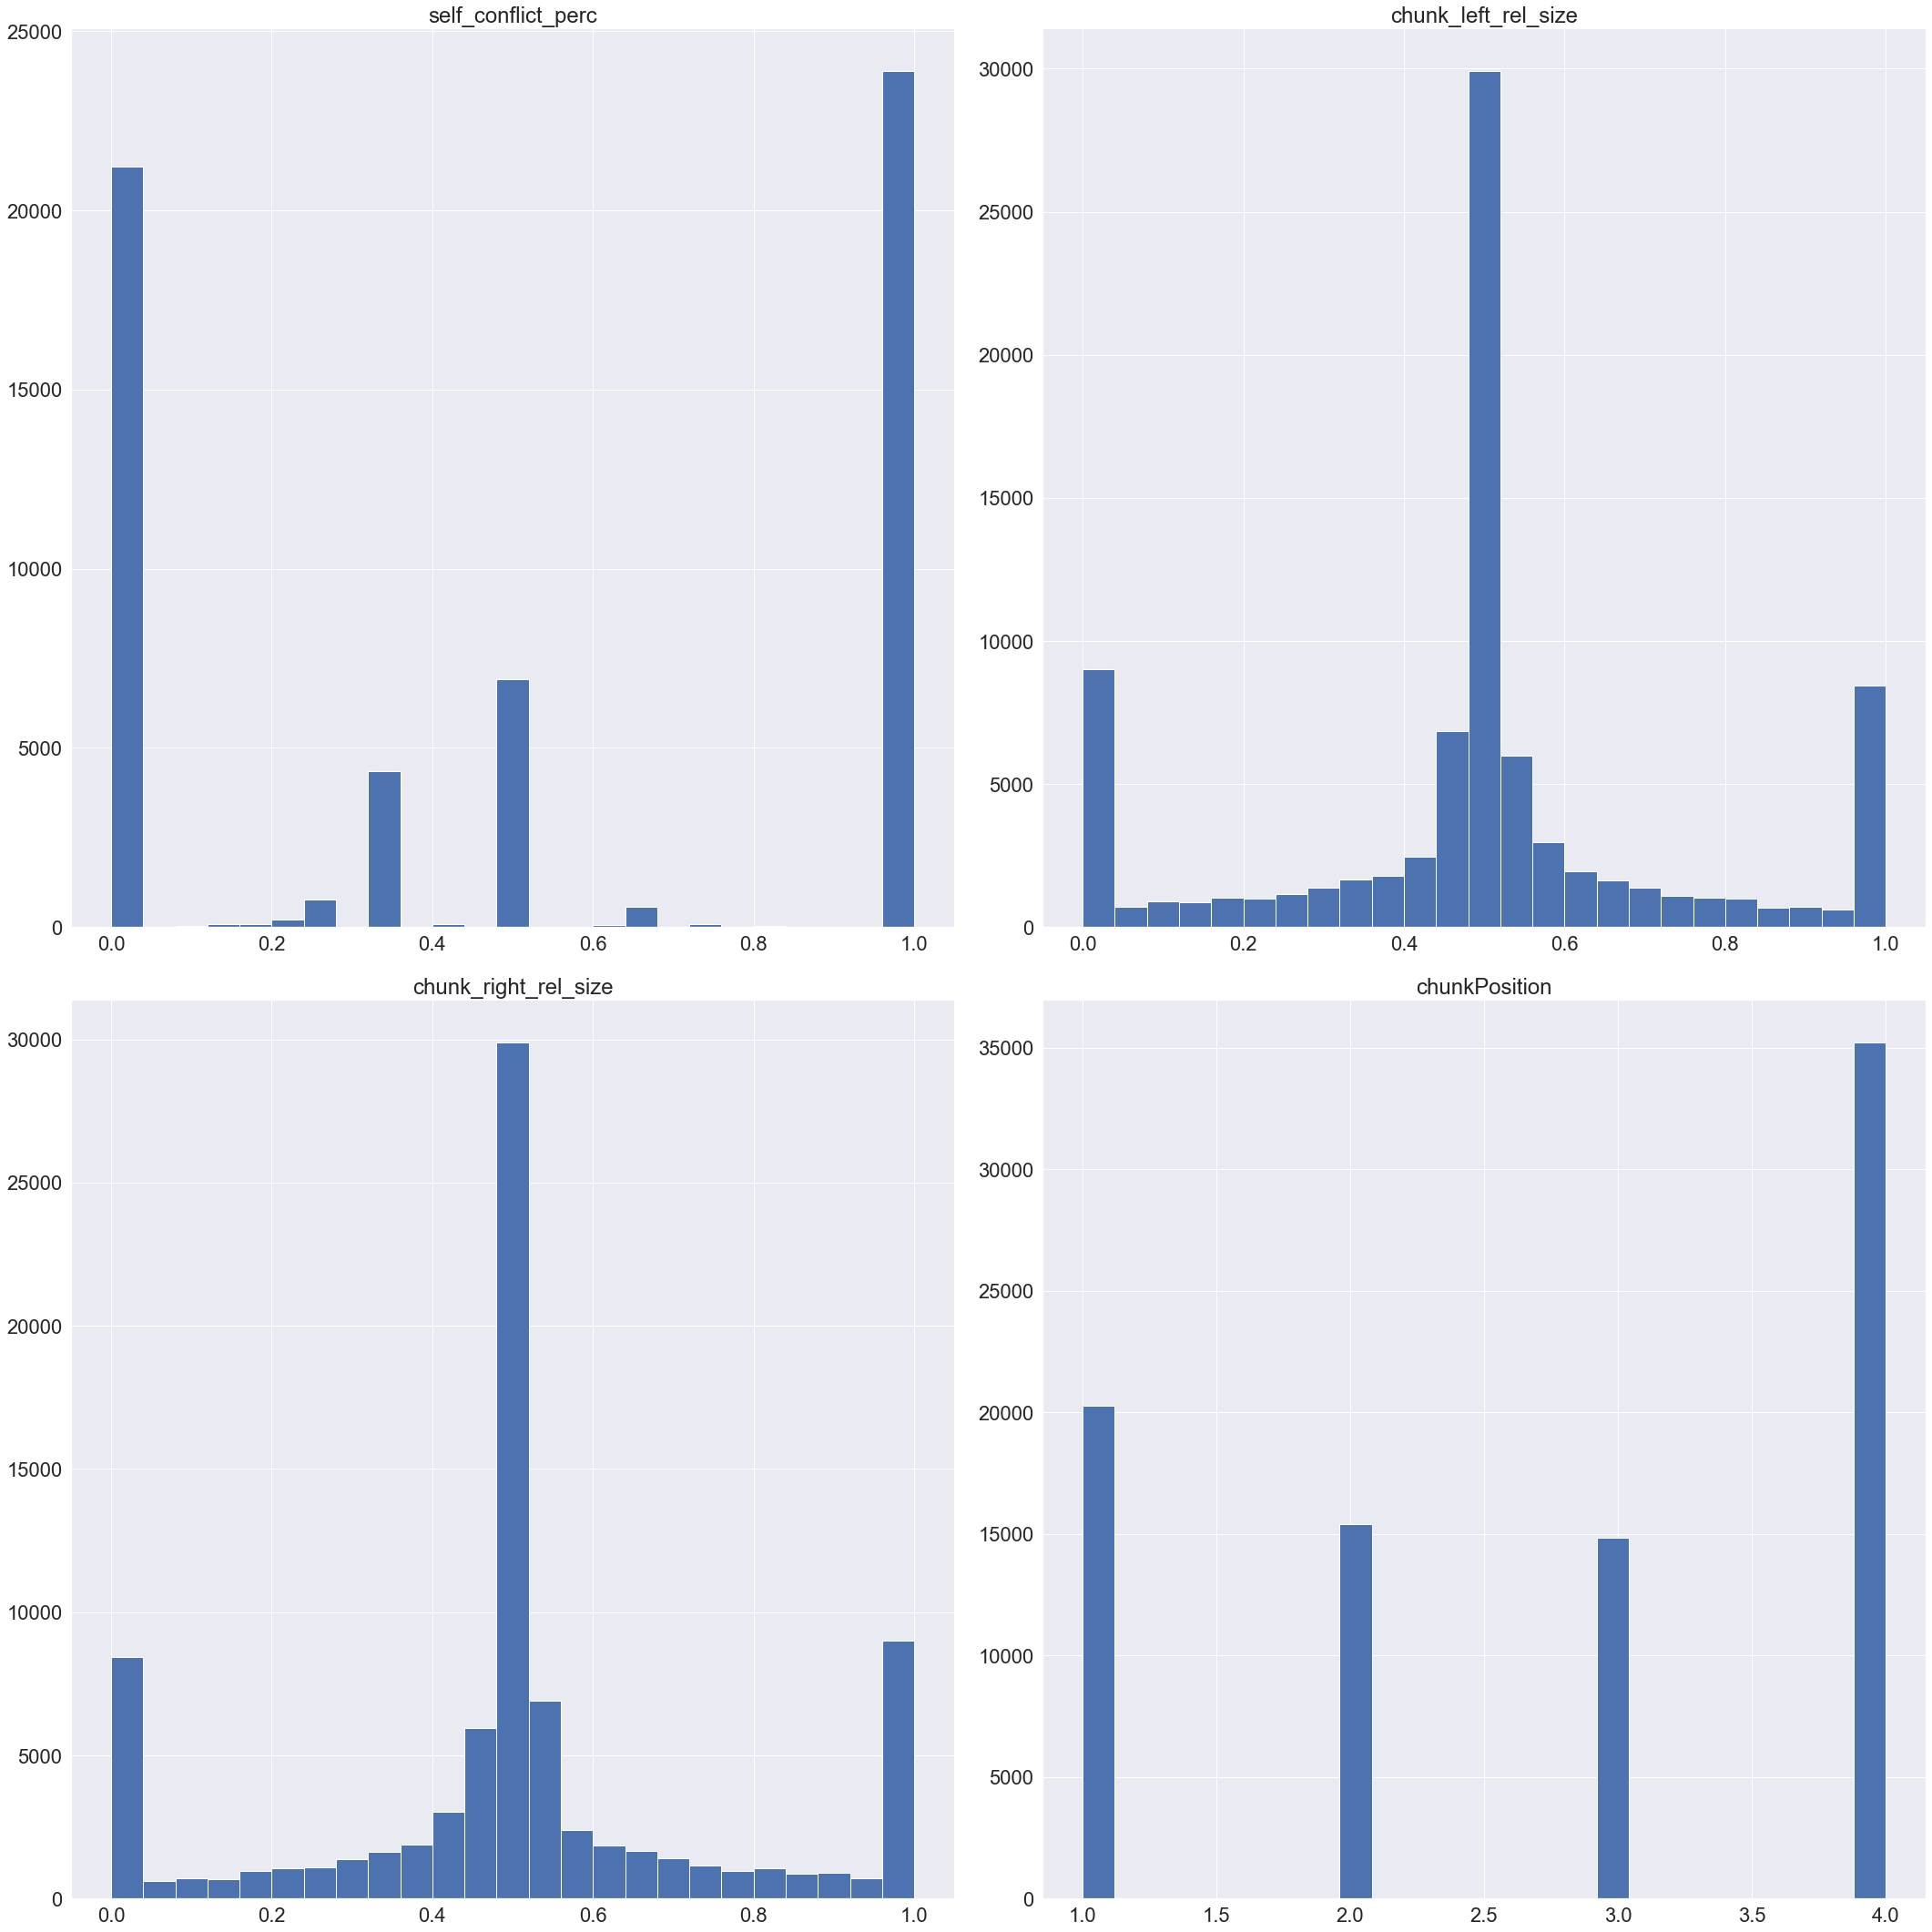

In [67]:
utils_attributes_analysis.hist_plot(chunk_columns_float, df, 2)

### Distribution of chunk continuous attributes per developerdecision

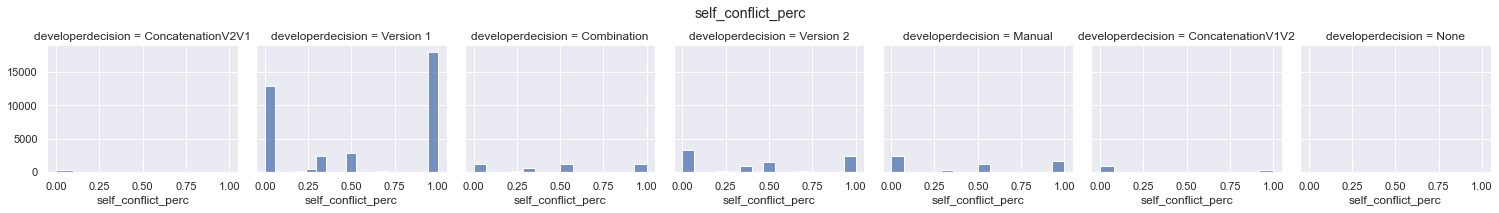

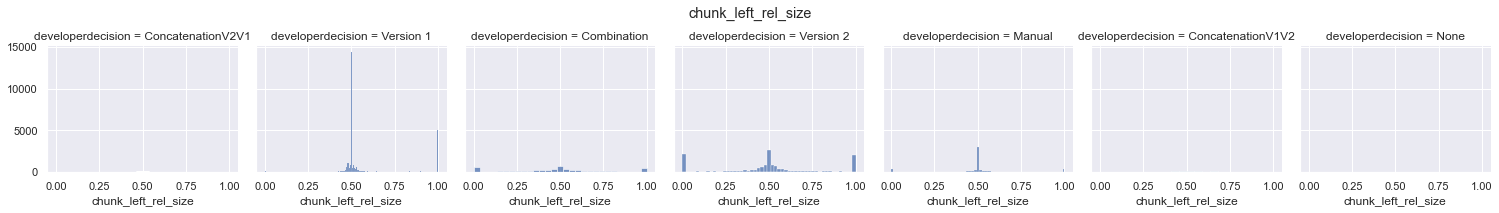

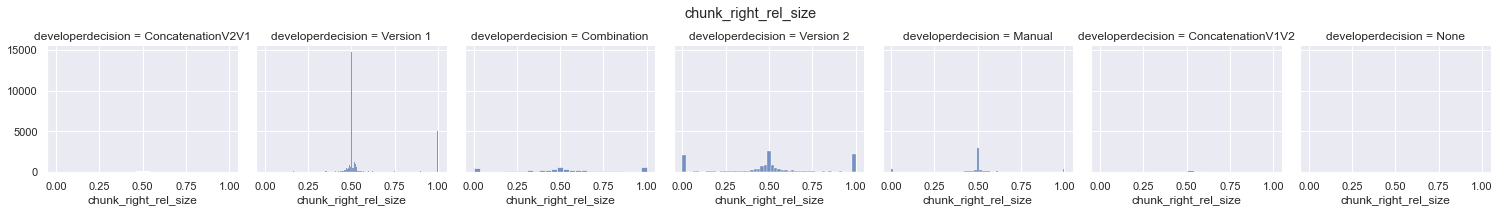

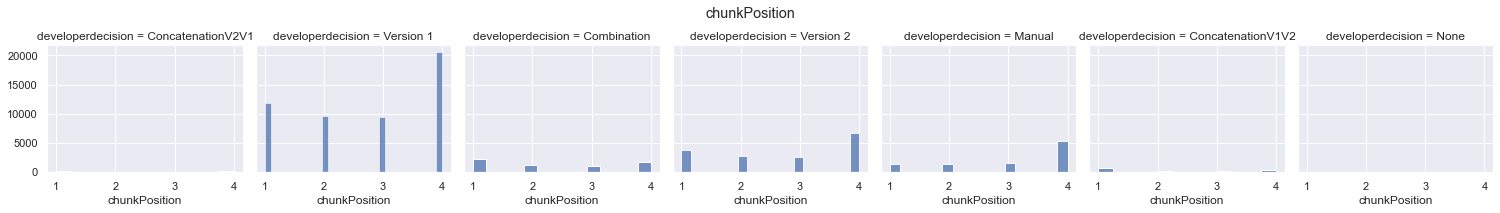

In [86]:
utils_attributes_analysis.hist_plot_by_category(chunk_columns_float, df, 'developerdecision')

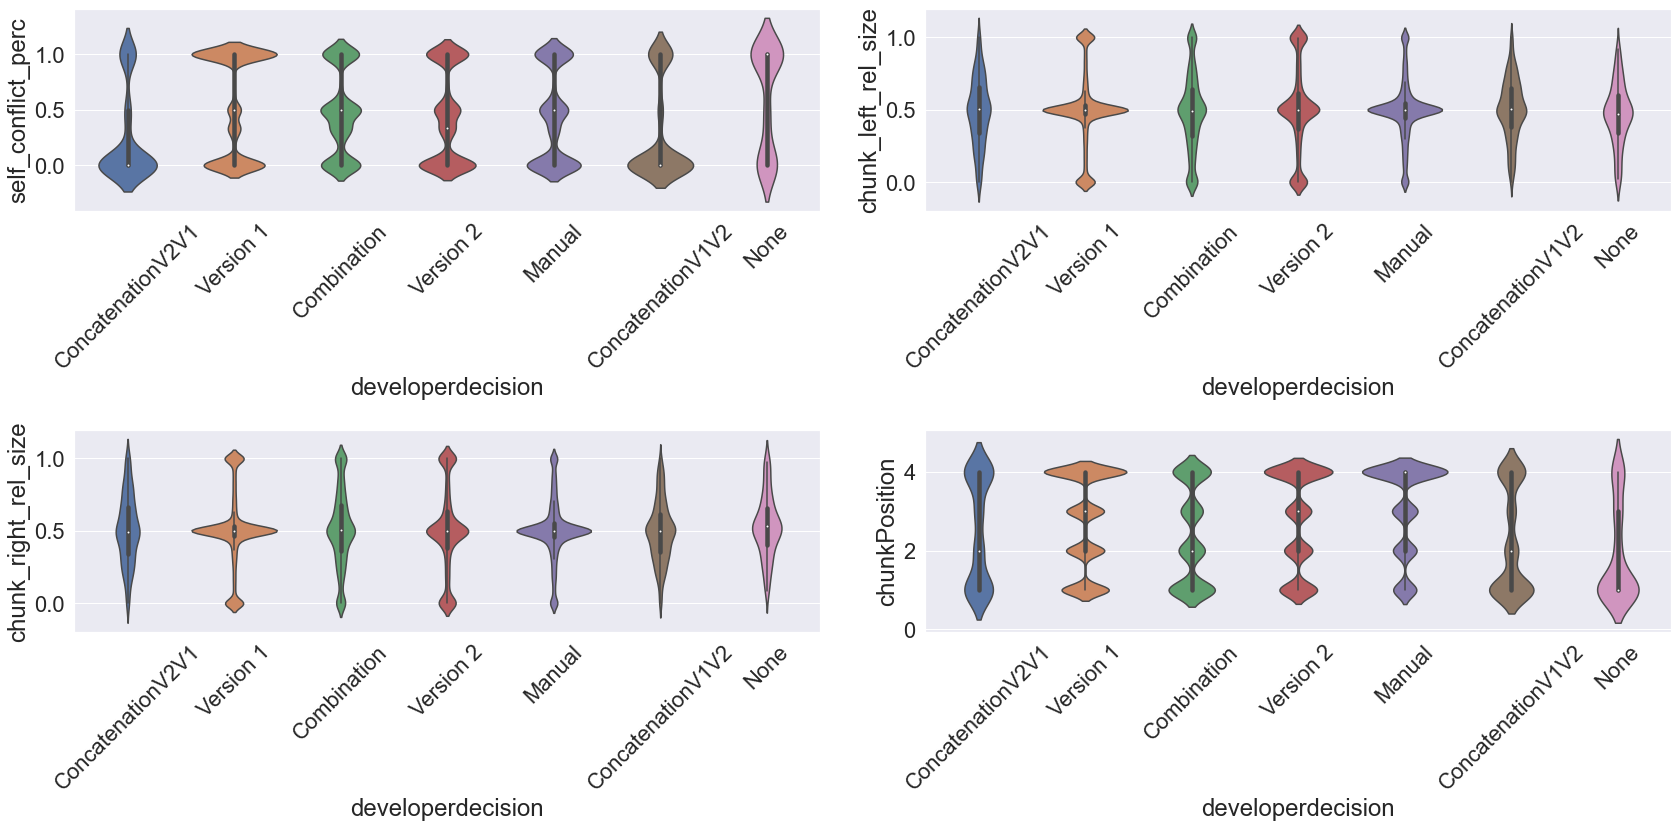

In [91]:
utils_attributes_analysis.violin_by_category(chunk_columns_float, df, 'developerdecision')

### Correlation between chunk continuous attributes and developerdecision

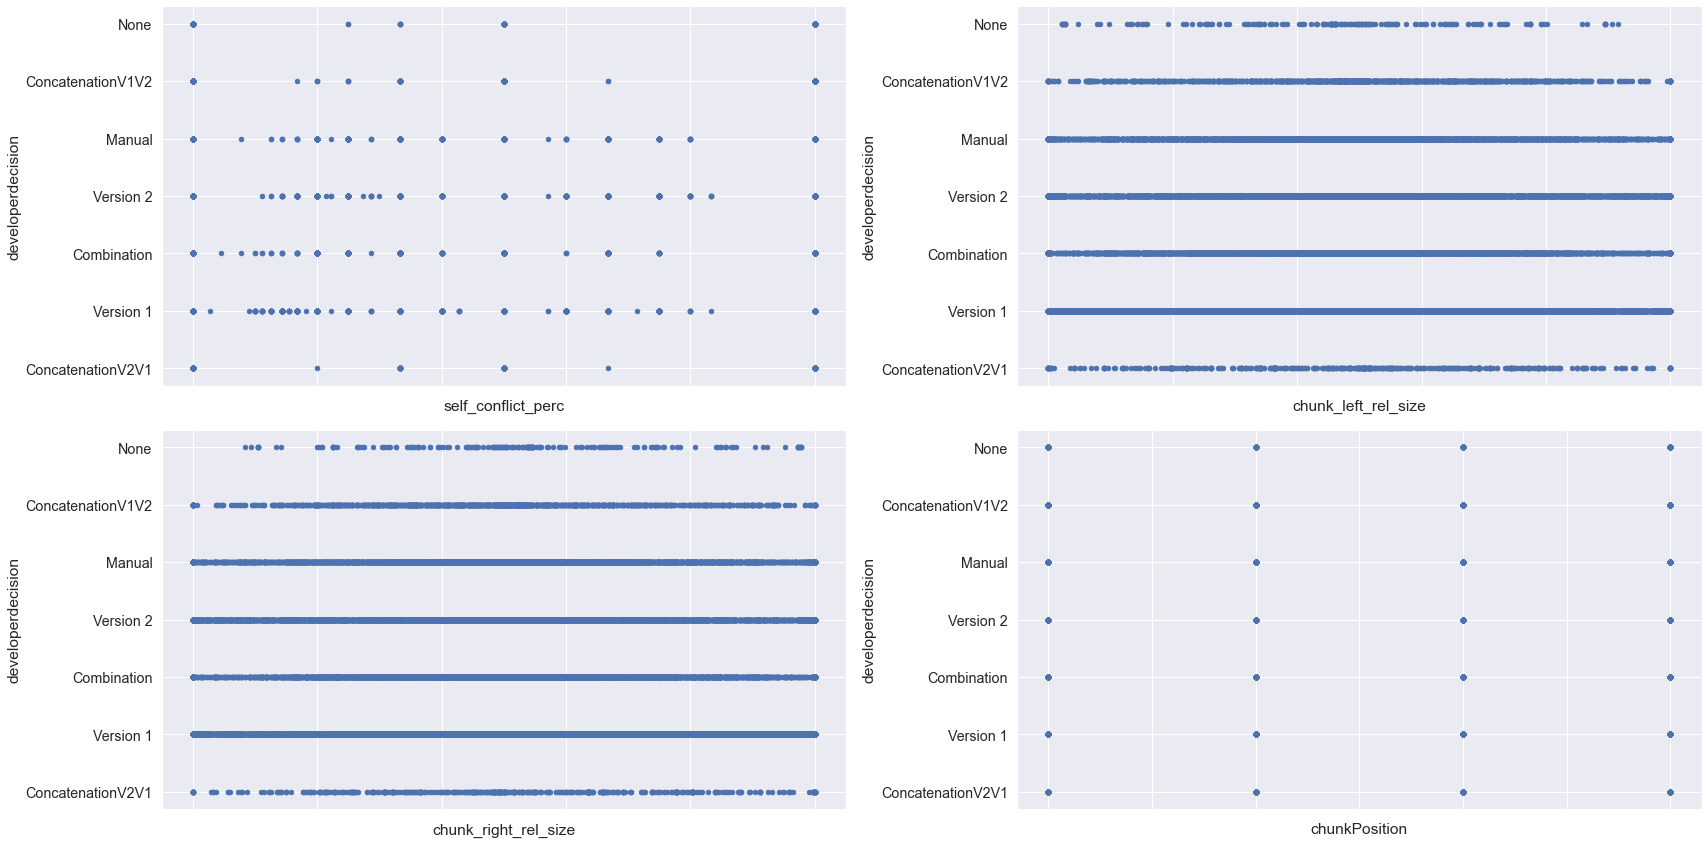

In [96]:
import importlib
importlib.reload(utils_attributes_analysis)
utils_attributes_analysis.scatter_by_category(chunk_columns_float, df, 'developerdecision')

### Probability plots for chunk continuous attributes (TODO)

In [118]:
test = df.round(3)
df_count = pd.crosstab(test['chunkPosition'], test['developerdecision'])
df_count

developerdecision,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None,Version 1,Version 2
chunkPosition,,,,,,,
1.0,2223,726,210,1429,122,11804,3745
2.0,1260,225,73,1461,19,9552,2798
3.0,1064,145,61,1576,24,9401,2587
4.0,1834,457,216,5284,37,20596,6798


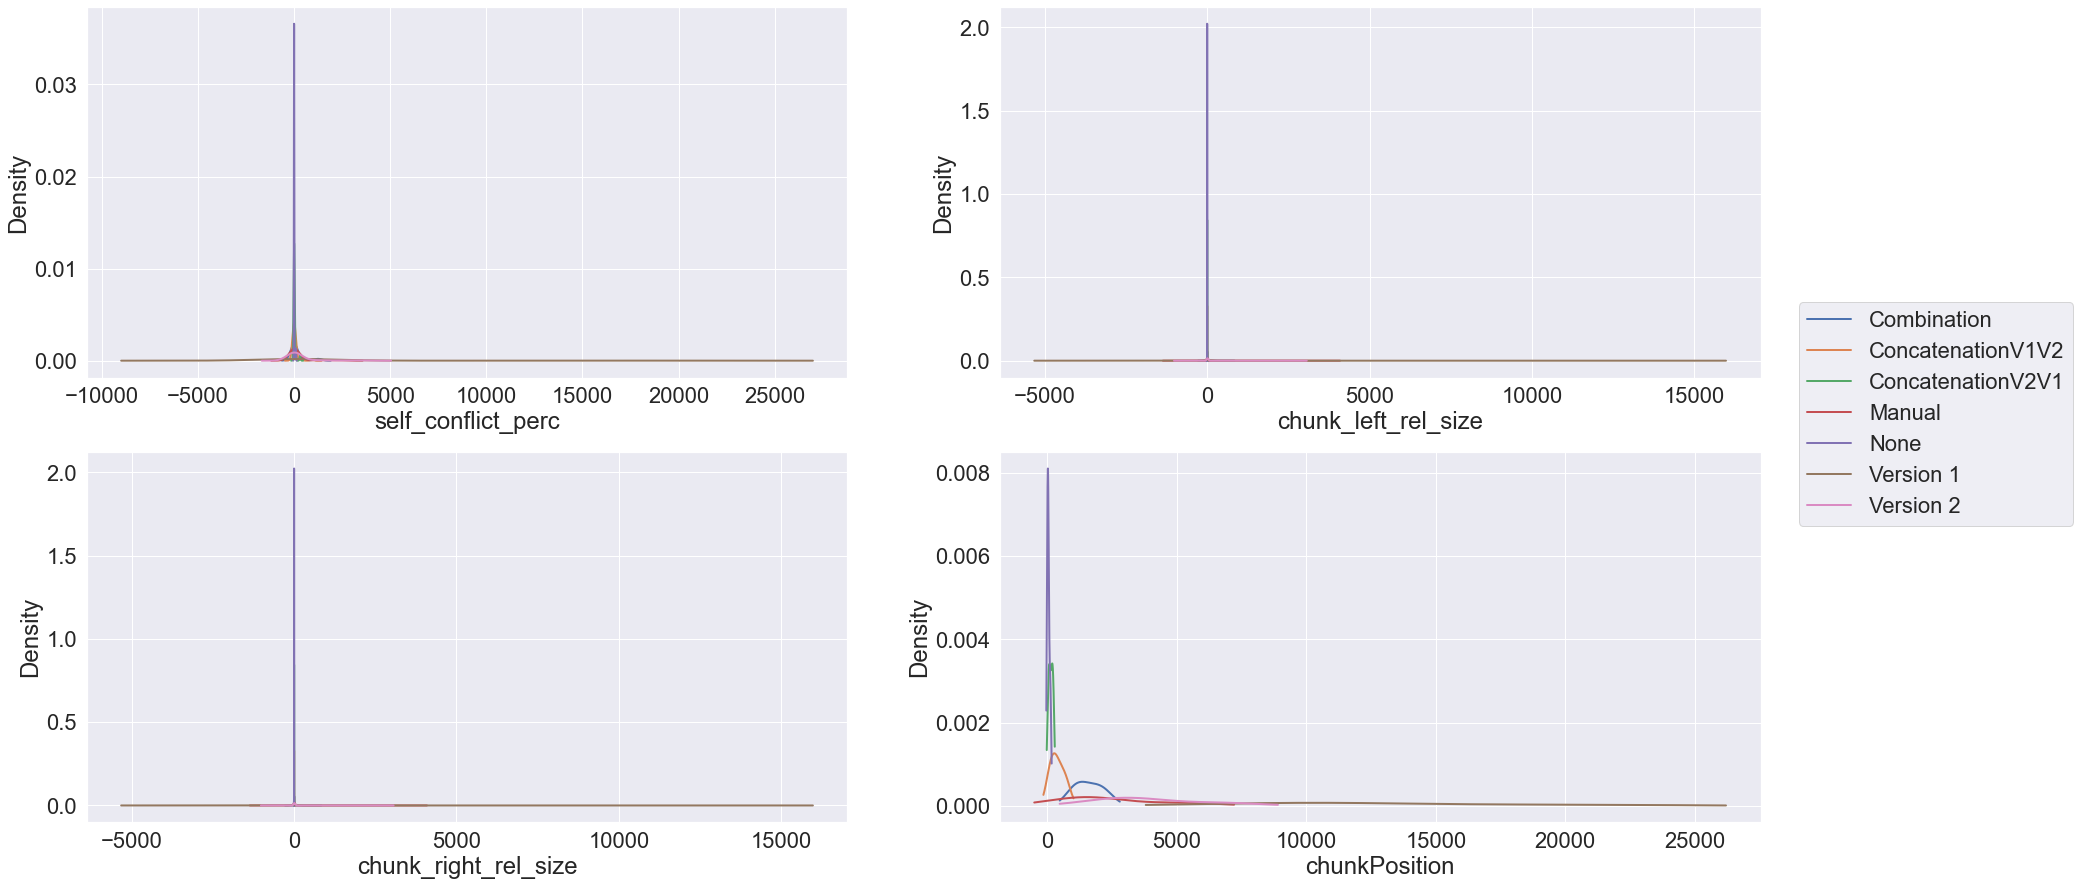

In [123]:
sns.set(font_scale=2)
i = j = 0
cols = 2
rows = math.ceil(len(chunk_columns_float)/cols)
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(30,15))
test = df.round(3)
for column in chunk_columns_float:
    data_wide = pd.crosstab(test[column], test['developerdecision'])
    g = data_wide.plot.density(linewidth = 2, legend=False, ax=axes[i][j])
    g.set_xlabel(column)

    if j == cols-1:
        j = 0
        i+=1
    else:
        j+=1
# plt.tight_layout()
h, l = axes[0][0].get_legend_handles_labels()
plt.legend(h,l, loc=(1.05, 0.8))

plt.show()

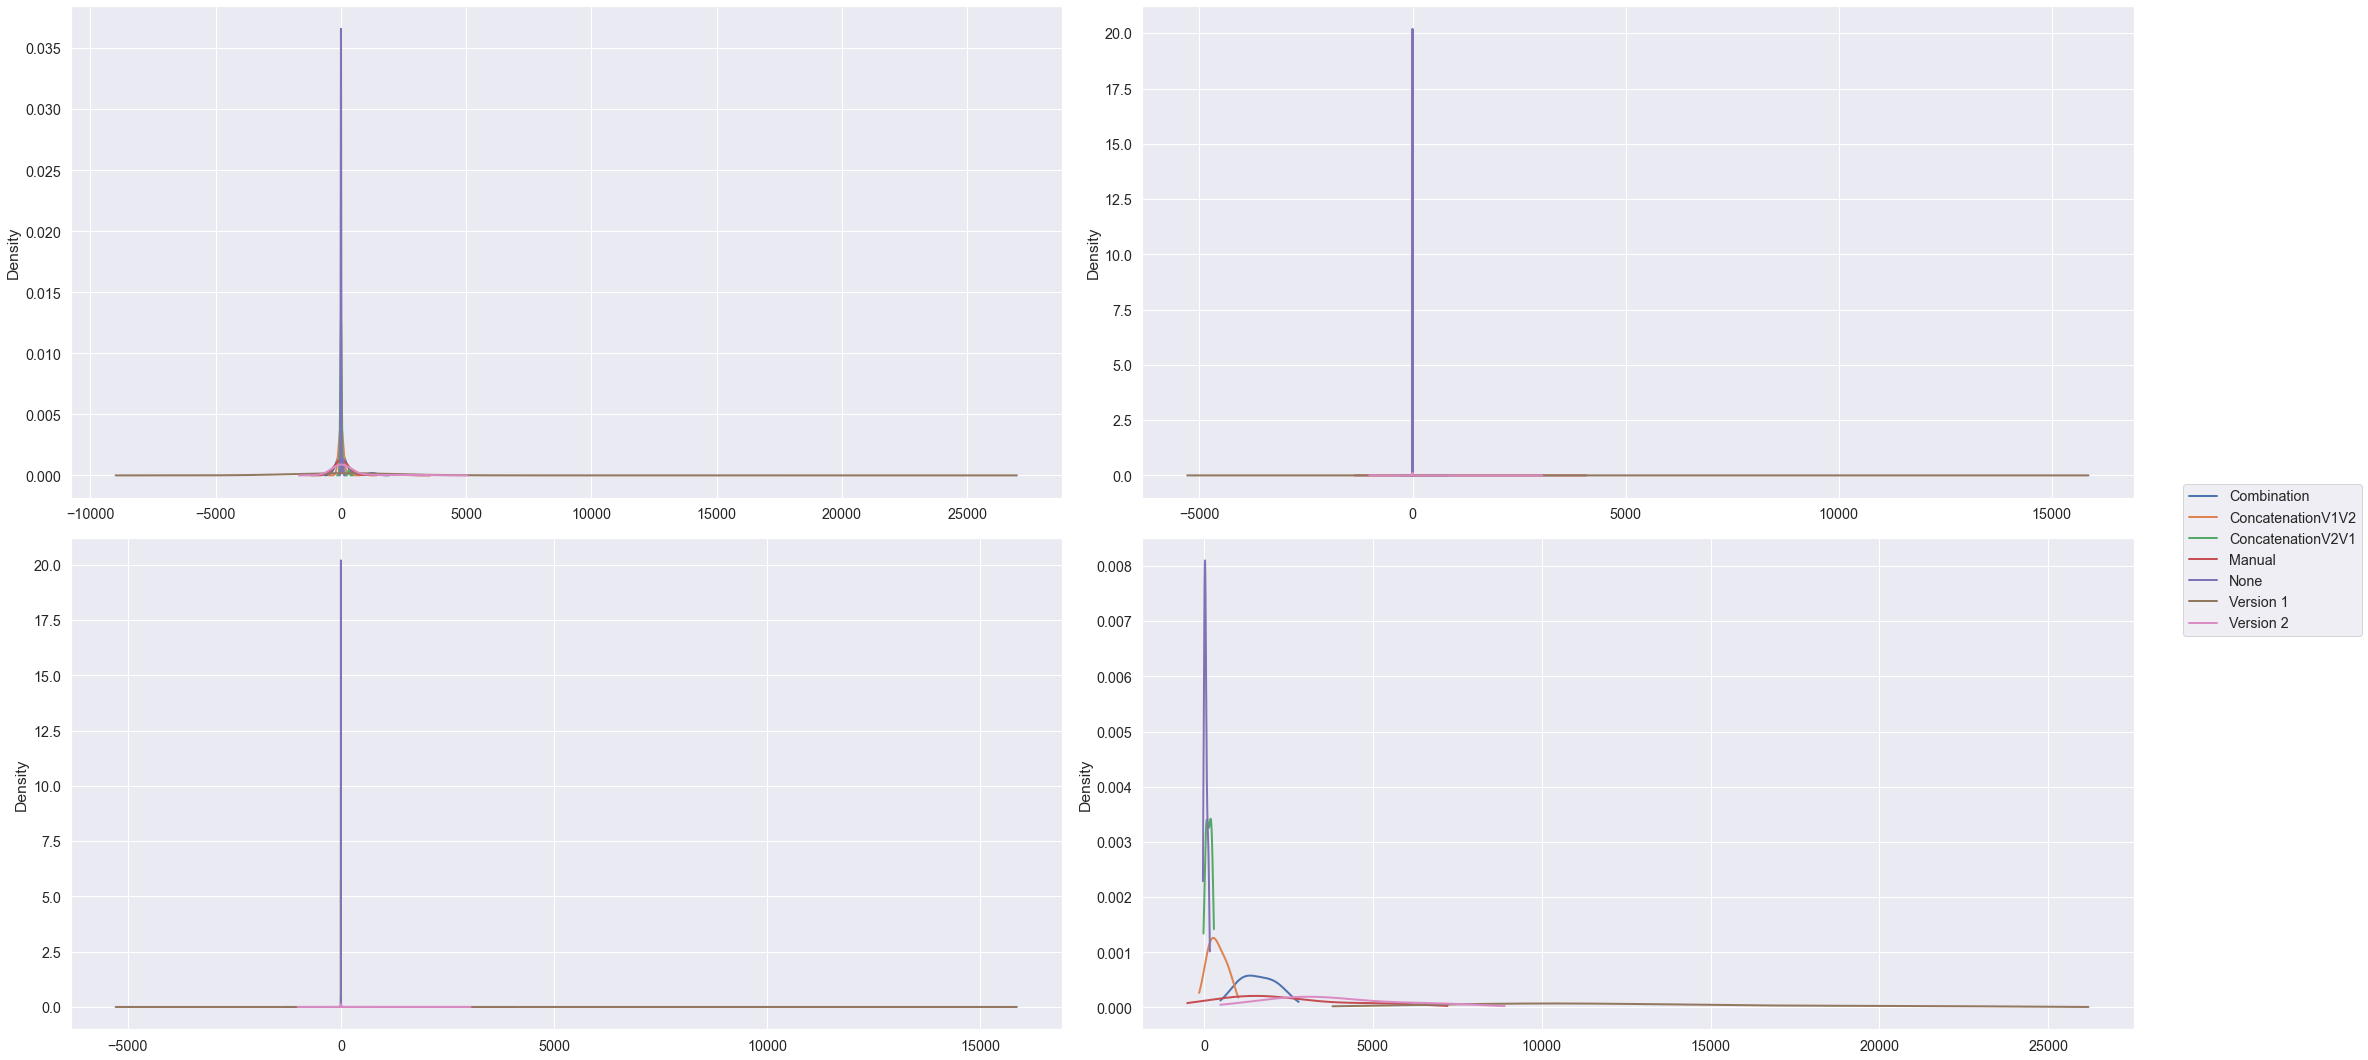

In [105]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
i = j = 0
cols = 2
rows = math.ceil(len(chunk_columns_float)/cols)
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(30,15))
for column in chunk_columns_float:
    data_wide = pd.crosstab(df[column], df['developerdecision'])
#     data_wide = data_wide.drop(columns=['UnknownConcatenation'])
    data_wide.plot.density(linewidth = 2, legend=False, ax=axes[i][j])
#     axes.set_xlabel(column)
#     plt.xlabel("left_lines_added")
# 
    if j == cols-1:
        j = 0
        i+=1
    else:
        j+=1
plt.tight_layout()
h, l = axes[0][0].get_legend_handles_labels()
plt.legend(h,l, loc=(1.05, 0.8))
# fig.subplots_adjust(hspace=1)
# plt.savefig('teste.png')
plt.show()

### Lift analysis for Chunk level attributes

In [9]:
all_df_increase = None
all_df_decrease = None
first = True
for file_level_attribute in chunk_columns_categorical:
    print(f'Lift analysis for {file_level_attribute} attribute:')
    lift, df_confidence, support, df_count = utils.lift_analysis(discretized, file_level_attribute, 'developerdecision')
    print('Count:')
    display(df_count)
    print('Confidence:')
    display(df_confidence)
    print('Lift:')
    display(lift)
    
    threshold = 0.5
    df_increase, df_decrease = utils.get_rules_of_interest(threshold, lift, file_level_attribute, df_confidence, df_count)
    if first:
        all_df_increase = df_increase
        all_df_decrease = df_decrease
        first = False
    else:
        all_df_increase = pd.concat([all_df_increase, df_increase])
        all_df_decrease = pd.concat([all_df_decrease, df_decrease])    

Lift analysis for leftCC attribute:
Count:


developerdecision,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None,Version 1,Version 2,Total
leftCC,,,,,,,,
Few (<10),6098,1536,552,9403,202,50421,15522,83734
Tens,251,17,8,337,0,920,383,1916
Hundreds,32,0,0,10,0,12,23,77


Confidence:


,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None,Version 1,Version 2
Few (<10),0.072826,0.018344,0.006592,0.112296,0.002412,0.602157,0.185373
Tens,0.131002,0.008873,0.004175,0.175887,0.000000,0.480167,0.199896
Hundreds,0.415584,0.000000,0.000000,0.129870,0.000000,0.155844,0.298701


Lift:


,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None,Version 1,Version 2
Few (<10),0.982414,1.011831,1.014909,0.990536,1.024546,1.007615,0.986465
Tens,1.767206,0.489409,0.642812,1.551457,1.000000,0.803484,1.063749
Hundreds,5.606195,1.000000,1.000000,1.145552,1.000000,0.260781,1.589546


Lift analysis for rightCC attribute:
Count:


developerdecision,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None,Version 1,Version 2,Total
rightCC,,,,,,,,
Few (<10),6055,1531,550,9394,195,49560,15619,82904
Tens,293,18,10,339,7,1530,295,2492
Hundreds,33,4,0,17,0,263,14,331


Confidence:


,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None,Version 1,Version 2
Few (<10),0.073036,0.018467,0.006634,0.113312,0.002352,0.597800,0.188399
Tens,0.117576,0.007223,0.004013,0.136035,0.002809,0.613965,0.118379
Hundreds,0.099698,0.012085,0.000000,0.051360,0.000000,0.794562,0.042296


Lift:


,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None,Version 1,Version 2
Few (<10),0.985253,1.018635,1.021356,0.999495,0.998943,1.000324,1.002568
Tens,1.586093,0.398422,0.617791,1.199933,1.192976,1.027374,0.629956
Hundreds,1.344915,0.666578,1.000000,0.453029,1.000000,1.329575,0.225080


Lift analysis for chunkAbsSize attribute:
Count:


developerdecision,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None,Version 1,Version 2,Total
chunkAbsSize,,,,,,,,
Few (<10),3449,1089,360,4448,160,30989,9078,49573
Tens,2597,431,179,4909,34,19056,6421,33627
Hundreds,276,30,21,375,8,1106,410,2226
Thousands,58,3,0,17,0,202,19,299
Tens of thousands,1,0,0,1,0,0,0,2


Confidence:


,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None,Version 1,Version 2
Few (<10),0.069574,0.021968,0.007262,0.089726,0.003228,0.625119,0.183124
Tens,0.077230,0.012817,0.005323,0.145984,0.001011,0.566687,0.190948
Hundreds,0.123989,0.013477,0.009434,0.168464,0.003594,0.496855,0.184187
Thousands,0.193980,0.010033,0.000000,0.056856,0.000000,0.675585,0.063545
Tens of thousands,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000


Lift:


,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None,Version 1,Version 2
Few (<10),0.938549,1.211718,1.118014,0.791453,1.370745,1.046038,0.974498
Tens,1.041820,0.706981,0.819511,1.287687,0.429410,0.948263,1.016133
Hundreds,1.672603,0.743387,1.452392,1.485975,1.526323,0.831410,0.980155
Thousands,2.616771,0.553438,1.000000,0.501514,1.000000,1.130486,0.338157
Tens of thousands,6.744954,1.000000,1.000000,4.410374,1.000000,1.000000,1.000000


Lift analysis for chunk_left_abs_size attribute:
Count:


developerdecision,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None,Version 1,Version 2,Total
chunk_left_abs_size,,,,,,,,
Zero,558,12,12,333,0,4831,2030,7776
Few (<10),28,28,2,82,2,1579,277,1998
Tens,1475,848,304,2029,147,16541,5115,26459
Hundreds,3759,610,214,6387,51,25879,7571,44471
Thousands,484,65,27,882,3,2610,1128,5199
Tens of thousands,81,0,1,54,0,77,78,291
Hundreds of thousands,6,0,0,7,0,5,2,20


Confidence:


,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None,Version 1,Version 2
Zero,0.071759,0.001543,0.001543,0.042824,0.000000,0.621271,0.261060
Few (<10),0.014014,0.014014,0.001001,0.041041,0.001001,0.790290,0.138639
Tens,0.055747,0.032050,0.011489,0.076685,0.005556,0.625156,0.193318
Hundreds,0.084527,0.013717,0.004812,0.143622,0.001147,0.581930,0.170246
Thousands,0.093095,0.012502,0.005193,0.169648,0.000577,0.502020,0.216965
Tens of thousands,0.278351,0.000000,0.003436,0.185567,0.000000,0.264605,0.268041
Hundreds of thousands,0.300000,0.000000,0.000000,0.350000,0.000000,0.250000,0.100000


Lift:


,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None,Version 1,Version 2
Zero,0.968026,0.085122,0.237583,0.377740,1.000000,1.039599,1.389235
Few (<10),0.189048,0.773003,0.154108,0.362013,0.425125,1.322427,0.737769
Tens,0.752017,1.767833,1.768846,0.676416,2.359531,1.046101,1.028746
Hundreds,1.140261,0.756609,0.740844,1.266851,0.487052,0.973768,0.905967
Thousands,1.255841,0.689624,0.799528,1.496422,0.245066,0.840051,1.154583
Tens of thousands,3.754923,1.000000,0.529050,1.636840,1.000000,0.442775,1.426388
Hundreds of thousands,4.046972,1.000000,1.000000,3.087262,1.000000,0.418336,0.532152


Lift analysis for chunk_right_abs_size attribute:
Count:


developerdecision,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None,Version 1,Version 2,Total
chunk_right_abs_size,,,,,,,,
Zero,446,19,11,384,0,5020,1965,7845
Few (<10),15,3,1,59,0,1587,120,1785
Tens,1429,933,289,1891,136,15483,5391,25552
Hundreds,3892,533,217,6445,53,25338,7657,44135
Thousands,511,71,42,934,13,3637,1013,6221
Tens of thousands,89,4,0,55,1,436,53,638
Hundreds of thousands,9,0,0,6,0,21,2,38


Confidence:


,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None,Version 1,Version 2
Zero,0.056851,0.002422,0.001402,0.048948,0.000000,0.639898,0.250478
Few (<10),0.008403,0.001681,0.000560,0.033053,0.000000,0.889076,0.067227
Tens,0.055925,0.036514,0.011310,0.074006,0.005322,0.605941,0.210982
Hundreds,0.088184,0.012077,0.004917,0.146029,0.001201,0.574102,0.173490
Thousands,0.082141,0.011413,0.006751,0.150137,0.002090,0.584633,0.162836
Tens of thousands,0.139498,0.006270,0.000000,0.086207,0.001567,0.683386,0.083072
Hundreds of thousands,0.236842,0.000000,0.000000,0.157895,0.000000,0.552632,0.052632


Lift:


,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None,Version 1,Version 2
Zero,0.766921,0.133592,0.215869,0.431761,1.000000,1.070769,1.332925
Few (<10),0.113361,0.092705,0.086248,0.291554,1.000000,1.487729,0.357749
Tens,0.754425,2.014075,1.741256,0.652788,2.260454,1.013947,1.122743
Hundreds,1.189594,0.666136,0.756949,1.288087,0.510005,0.960670,0.923233
Thousands,1.108076,0.629531,1.039391,1.324318,0.887493,0.978291,0.866533
Tens of thousands,1.881821,0.345826,1.000000,0.760409,0.665673,1.143539,0.442070
Hundreds of thousands,3.194978,1.000000,1.000000,1.392750,1.000000,0.924742,0.280080


In [10]:
    print(f"Mined rules with at least {threshold*100:.2f}% increased chance")
    display(all_df_increase.sort_values(by=['Lift'], ascending=False))
    
    print(f"Mined rules with at least {threshold*100:.2f}% decreased chance")
    display(all_df_decrease.sort_values(by=['Lift']))

Mined rules with at least 50.00% increased chance


,Rule,Lift,Confidence,Occurrences
0,chunkAbsSize=Tens of thousands => Combination,6.744954,0.500000,1
0,leftCC=Hundreds => Combination,5.606195,0.415584,32
1,chunkAbsSize=Tens of thousands => Manual,4.410374,0.500000,1
0,chunk_left_abs_size=Hundreds of thousands => C...,4.046972,0.300000,6
1,chunk_left_abs_size=Tens of thousands => Combi...,3.754923,0.278351,81
0,chunk_right_abs_size=Hundreds of thousands => ...,3.194978,0.236842,9
2,chunk_left_abs_size=Hundreds of thousands => M...,3.087262,0.350000,7
2,chunkAbsSize=Thousands => Combination,2.616771,0.193980,58
3,chunk_left_abs_size=Tens => None,2.359531,0.005556,147
1,chunk_right_abs_size=Tens => None,2.260454,0.005322,136


Mined rules with at least 50.00% decreased chance


,Rule,Lift,Confidence,Occurrences
0,chunk_left_abs_size=Zero => ConcatenationV1V2,0.085122,0.001543,12
0,chunk_right_abs_size=Few (<10) => Concatenatio...,0.086248,0.000560,1
1,chunk_right_abs_size=Few (<10) => Concatenatio...,0.092705,0.001681,3
2,chunk_right_abs_size=Few (<10) => Combination,0.113361,0.008403,15
3,chunk_right_abs_size=Zero => ConcatenationV1V2,0.133592,0.002422,19
1,chunk_left_abs_size=Few (<10) => Concatenation...,0.154108,0.001001,2
2,chunk_left_abs_size=Few (<10) => Combination,0.189048,0.014014,28
4,chunk_right_abs_size=Zero => ConcatenationV2V1,0.215869,0.001402,11
0,rightCC=Hundreds => Version 2,0.225080,0.042296,14
3,chunk_left_abs_size=Zero => ConcatenationV2V1,0.237583,0.001543,12


## File attributes

### Distribution of file categorical attributes

In [ ]:
sns.set_context("paper", font_scale=1.5)



for categorical_feature in file_columns_categorical:
    x,y = categorical_feature, 'developerdecision'

    df1 = discretized.groupby(x, observed=True)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()
    g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1, height=6, aspect = 15/6)
    g.ax.set_ylim(0,100)
    g.ax.set_title(f"Relative distribution per discretized level of {categorical_feature} attribute")

    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)

    plt.tight_layout()
    plt.show()


In [ ]:
sns.set(font_scale=1)
sns.set_context("paper", font_scale=1.5)

plt.figure(figsize=(10,6))
for categorical_feature in file_columns_categorical:
    g = sns.countplot(x=categorical_feature, hue='developerdecision', data=discretized)
    g.set_yscale("log")
    g.set_title(f"Count distribution per discretized level of {categorical_feature} attribute")
    g.set_xticklabels(labels, rotation=40)

plt.legend(loc='right')
plt.tight_layout()
plt.show()


### Lift analysis for File level attributes

In [11]:
all_df_increase = None
all_df_decrease = None
first = True
for file_level_attribute in file_columns_categorical:
    print(f'Lift analysis for {file_level_attribute} attribute:')
    lift, df_confidence, support, df_count = utils.lift_analysis(discretized, file_level_attribute, 'developerdecision')
    print('Count:')
    display(df_count)
    print('Confidence:')
    display(df_confidence)
    print('Lift:')
    display(lift)
    
    threshold = 0.5
    df_increase, df_decrease = utils.get_rules_of_interest(threshold, lift, file_level_attribute, df_confidence, df_count)
    if first:
        all_df_increase = df_increase
        all_df_decrease = df_decrease
        first = False
    else:
        all_df_increase = pd.concat([all_df_increase, df_increase])
        all_df_decrease = pd.concat([all_df_decrease, df_decrease])  

Lift analysis for fileCC attribute:
Count:


developerdecision,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None,Version 1,Version 2,Total
fileCC,,,,,,,,
Few (<10),1533,313,135,4012,53,10607,4730,21383
Tens,2698,595,226,3009,99,13795,6739,27161
Hundreds,1925,606,186,2330,46,13293,4010,22396
Thousands,225,39,13,399,4,13658,449,14787


Confidence:


,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None,Version 1,Version 2
Few (<10),0.071692,0.014638,0.006313,0.187626,0.002479,0.496048,0.221204
Tens,0.099334,0.021906,0.008321,0.110784,0.003645,0.507897,0.248113
Hundreds,0.085953,0.027058,0.008305,0.104036,0.002054,0.593543,0.179050
Thousands,0.015216,0.002637,0.000879,0.026983,0.000271,0.923649,0.030365


Lift:


,Combination,ConcatenationV1V2,ConcatenationV2V1,Manual,None,Version 1,Version 2
Few (<10),0.967125,0.807411,0.971975,1.654999,1.052662,0.830059,1.177141
Tens,1.340001,1.208342,1.281010,0.977196,1.548001,0.849887,1.320340
Hundreds,1.159496,1.492523,1.278593,0.917679,0.872307,0.993202,0.952818
Thousands,0.205263,0.145480,0.135348,0.238012,0.114885,1.545582,0.161585


In [12]:
    print(f"Mined rules with at least {threshold*100:.2f}% increased chance")
    display(all_df_increase.sort_values(by=['Lift'], ascending=False))
    
    print(f"Mined rules with at least {threshold*100:.2f}% decreased chance")
    display(all_df_decrease.sort_values(by=['Lift']))

Mined rules with at least 50.00% increased chance


,Rule,Lift,Confidence,Occurrences
0,fileCC=Few (<10) => Manual,1.654999,0.187626,4012
1,fileCC=Tens => None,1.548001,0.003645,99
2,fileCC=Thousands => Version 1,1.545582,0.923649,13658


Mined rules with at least 50.00% decreased chance


,Rule,Lift,Confidence,Occurrences
0,fileCC=Thousands => None,0.114885,0.000271,4
1,fileCC=Thousands => ConcatenationV2V1,0.135348,0.000879,13
2,fileCC=Thousands => ConcatenationV1V2,0.145480,0.002637,39
3,fileCC=Thousands => Version 2,0.161585,0.030365,449
4,fileCC=Thousands => Combination,0.205263,0.015216,225
5,fileCC=Thousands => Manual,0.238012,0.026983,399


## Merge attributes (TODO)

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
i = j = 0
cols = 4
rows = 11
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(22,15))
for column in df.select_dtypes(include=numerics):
    df.boxplot(column=column, ax=axes[i][j], showfliers=False) # add boxplot to 1st subplot
    if j == cols-1:
        j = 0
        i+=1
    else:
        j+=1
plt.tight_layout()
plt.show()